**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Renzo Zagni
*   MATRÍCULA: A01795457


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
DIR = '/content/drive/MyDrive/Colab Notebooks/Ciencia y Analitica de Datos/Actividad 2'
os.chdir(DIR)

Mounted at /content/drive


In [2]:
import pandas as pd
air_df = pd.read_csv('LaqnData.csv')

In [3]:
# Numero de filas y columnas en el data frame
air_df.shape

(43800, 6)

In [4]:
# Nombre de las columnas en el data frame
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [5]:
# Primeras 5 files del data frame
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [6]:
# Ultimas 5 files del data frame
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [7]:
# Tipos de datos del data frame
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [8]:
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

In [9]:
# Numero de mediciones = 8,760
# Numero de contaminantes analizados = 5
# Columnas que no agregan valor informative: Site, Provisional or Ratified
# Eliminacion de las dos columnas en el data frame
air_df.drop(columns=['Site', 'Provisional or Ratified'], inplace=True)

In [10]:
air_df.Units.unique()
# Los tres valores en el atributo Units representan la misma unidad

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [11]:
# Eliminar columna Units del data frame
air_df.drop(columns=['Units'], inplace=True)

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [12]:
air_df.value_counts('Species')

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
dtype: int64

In [13]:
# Las lecturas de cada contaminante coincide con el total de las mediciones

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [14]:
air_df.groupby('Species').Value.mean()

Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64

5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [15]:
pvt_df = air_df.pivot(index='ReadingDateTime',
              columns='Species',
              values='Value')

In [16]:
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [17]:
pvt_df.describe()

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


In [18]:
# Mayor valor de NO2 registrado: 120.200000
# Dia: 24 de Enero de 2017
pvt_df.loc[pvt_df['NO2'] == pvt_df['NO2'].max()]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
24/01/2017 19:00,148.60001,120.2,348.10001,44.4,42.0


In [19]:
# Menor valor de PM10 registrado: -5.600000
# Dia: 12 de Septiembre de 2017
pvt_df.loc[pvt_df['PM10'] == pvt_df['PM10'].min()]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
12/09/2017 23:00,0.1,7.0,7.1,-5.6,NaN


In [20]:
# La mediana de NO es 7.1
# La mediana nos divide el data set en dos partes donde la mitad de las lecturas
# estan por debajo de 7.1 mientras que la otra mitad se encuentra por encima de
# este valor
pvt_df['NO'].median()

7.1

In [21]:
# El primer cuartil de PM2.5 es de 7.000000.
# El primer representa el 25 % de los datos definidos como el rango de valores
# que se encuentra entre el numero  minimo  y el numero medio de la mediana
# En nuestro caso esto significa que el 25% de los valores de las lecturas
# de PM2.5 se encuentran entre -8.000000  y 7.000000


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

array([[<Axes: title={'center': 'PM2.5'}>]], dtype=object)

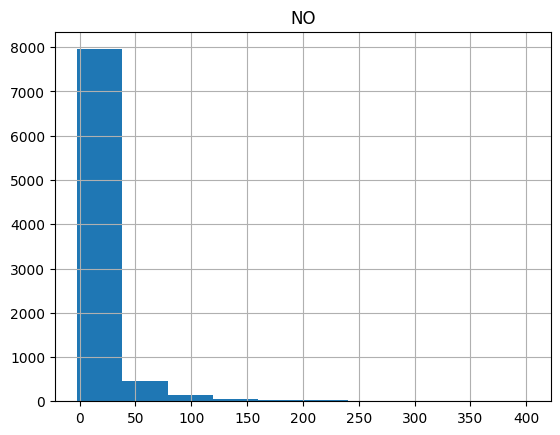

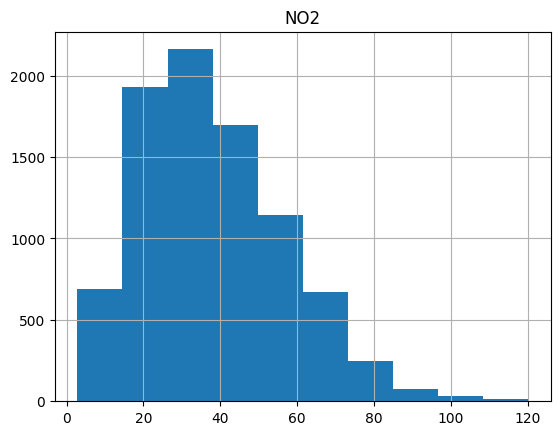

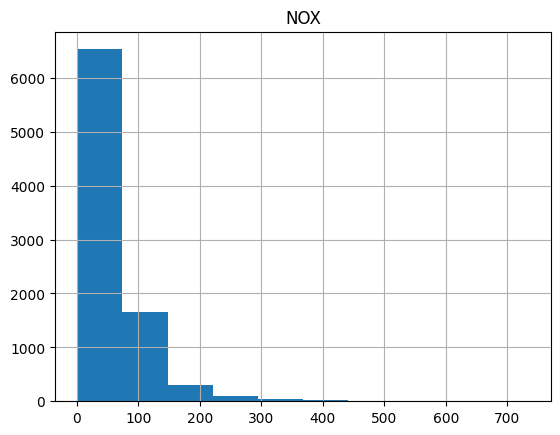

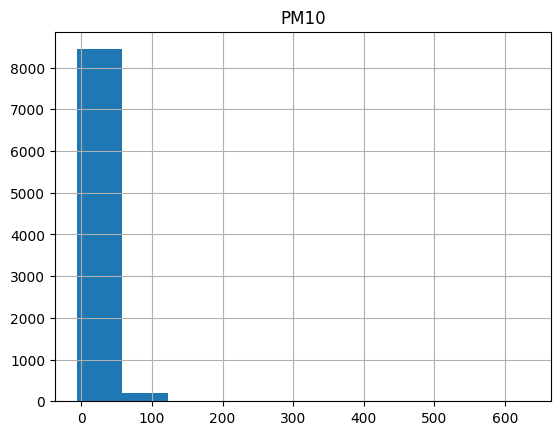

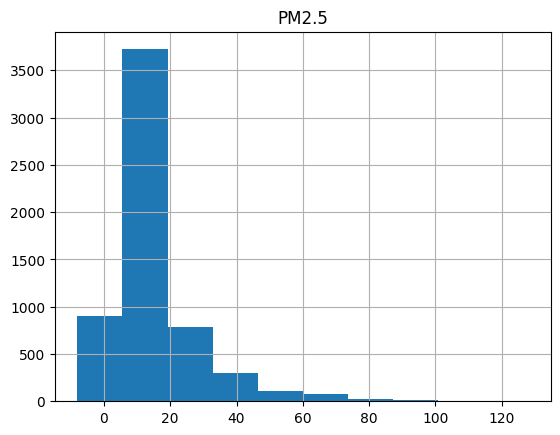

In [22]:
pvt_df.hist(column='NO')
pvt_df.hist(column='NO2')
pvt_df.hist(column='NOX')
pvt_df.hist(column='PM10')
pvt_df.hist(column='PM2.5')
# La variabilidad mas alta la tiene el NO2

In [23]:
datetime_dfx = air_df.ReadingDateTime.str.split(' ',expand=True)

In [24]:
datetime_dfx.columns = ['Date','Time']
datetime_dfx

,Date,Time
0,01/01/2017,00:00
1,01/01/2017,01:00
2,01/01/2017,02:00
3,01/01/2017,03:00
4,01/01/2017,04:00
...,...,...
43795,31/12/2017,19:00
43796,31/12/2017,20:00
43797,31/12/2017,21:00
43798,31/12/2017,22:00


8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [25]:
# Divide los datos en la column ReadingDateTime en Feacha y Hora y crea un
# data frame de dos columnas con esta data
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
# Asigna nombre a las columnas del data frame
datetime_df.columns = ['Date','Time']
# Describe el data frame datetime_df
datetime_df
# Divide los datos de Fecha de la columna Date en Dia, Mes y Año
# y crea un data frame de tres columns con la data resultante
date_df = datetime_df.Date.str.split('/',expand=True)
# Asigna nombre a las columnas del data frame
date_df.columns = ['Day','Month','Year']
# Describe el data frame date_df
date_df
# Crea un nuevo data frame de la union de los data frames air_df y datetime_df
# Del data frame resultante, se elimina las columnas ReadingDateTime y Year
# El data frame resultante se le reasigna a la variable air_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
# Define las columnas Month, Day, Time y Species como indexes de un nuevo
# data frame, el que una vez mas se le reassigna a la variable air_df
air_df = air_df.set_index(['Month','Day','Time','Species'])
# Describe el data frame air_df
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [26]:
air_df.unstack()
# Los resultados son diferentes. El metodo unstack() revierte la asignacion de
# indices. El el caso de data frames de multiple indices , como es esta caso,
# unstack() se le aplica al indice mas interno que en nuestro caso es Species

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Stack() y pivot() en Pandas son funciones para reestructurar data frames, convirtiendo columnas en filas. Pivot() permite especificar las columnas que actuarán como índices, columnas y valores en la transformación. Stack() no ofrece esa flexibilidad, y las columnas a pivotar se determinan según su posición en una jerarquía, especialmente en columnas con índices múltiples.

Unstack() la función reverso de stack(), deshaciendo las transformaciones hechas por stack().

Por su parte, melt() es el reverso de pivot(), aunque no siempre restaura el data frame original. Esto se debe a que durante la ejecución de pivot(), algunas filas pueden no ser incluidas debido a los argumentos de la invocación a pivot().

Entre stack() y unstack(), considero que unstack() es la contraparte de melt(), ya que ambas revierten la transformación de un DataFrame pivotado a su forma original.